In [2]:
# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Loading the Dataset
file_path = "synthetic_sales_data.csv"
data = pd.read_csv(file_path)
data

,Date,Product Category,Product Name,Sales Amount,Quantity Sold,Region,Customer Segment,Discount Applied
0,2023-01-01 00:00:00.000000000,Furniture,Simple,510.20,19,North,Individual,12.77
1,2023-01-01 17:30:25.250501002,Beauty,And,828.19,4,North,Individual,13.04
2,2023-01-02 11:00:50.501002004,Groceries,Next,326.85,18,East,Corporate,3.46
3,2023-01-03 04:31:15.751503006,Beauty,How,896.57,2,South,Corporate,47.99
4,2023-01-03 22:01:41.002004008,Beauty,Yet,395.31,1,East,Individual,23.91
...,...,...,...,...,...,...,...,...
495,2023-12-28 01:58:18.997995992,Electronics,President,897.37,11,North,Corporate,8.26
496,2023-12-28 19:28:44.248496996,Groceries,Individual,22.87,18,East,Individual,19.49
497,2023-12-29 12:59:09.498997996,Electronics,End,94.65,12,South,Corporate,36.49
498,2023-12-30 06:29:34.749499000,Electronics,Television,215.81,12,North,Individual,44.11


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [13]:
# convert 'Date' to datetime

In [15]:
data["Date"]=pd.to_datetime(data["Date"])

In [16]:
# Display the first few rows of the dataset

In [25]:
data.head(10)

,Date,Product Category,Product Name,Sales Amount,Quantity Sold,Region,Customer Segment,Discount Applied
0,2023-01-01 00:00:00.000000000,Furniture,Simple,510.20,19,North,Individual,12.77
1,2023-01-01 17:30:25.250501002,Beauty,And,828.19,4,North,Individual,13.04
2,2023-01-02 11:00:50.501002004,Groceries,Next,326.85,18,East,Corporate,3.46
3,2023-01-03 04:31:15.751503006,Beauty,How,896.57,2,South,Corporate,47.99
4,2023-01-03 22:01:41.002004008,Beauty,Yet,395.31,1,East,Individual,23.91
5,2023-01-04 15:32:06.252505010,Clothing,Watch,20.73,15,East,Individual,44.79
6,2023-01-05 09:02:31.503006012,Groceries,Matter,906.33,5,South,Individual,16.11
7,2023-01-06 02:32:56.753507014,Groceries,Course,100.37,11,West,Individual,6.26
8,2023-01-06 20:03:22.004008016,Groceries,Leg,326.12,10,North,Corporate,23.72
9,2023-01-07 13:33:47.254509018,Beauty,Report,950.56,2,West,Corporate,5.70


In [37]:
# Exploratory Data Analysis (EDA)
print("Data Summary:")
data.info()
print("Missing Values:")
data.isnull().sum()
print("Statistics:")
data.describe()


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              500 non-null    datetime64[ns]
 1   Product Category  500 non-null    object        
 2   Product Name      498 non-null    object        
 3   Sales Amount      500 non-null    float64       
 4   Quantity Sold     500 non-null    int64         
 5   Region            500 non-null    object        
 6   Customer Segment  500 non-null    object        
 7   Discount Applied  500 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 31.4+ KB
Missing Values:
Statistics:


,Date,Sales Amount,Quantity Sold,Discount Applied
count,500,500.000000,500.000000,500.000000
mean,2023-07-02 00:00:00,494.486200,10.058000,24.472120
min,2023-01-01 00:00:00,14.590000,1.000000,0.010000
25%,2023-04-02 00:00:00,230.957500,5.000000,11.317500
50%,2023-07-02 00:00:00,488.005000,10.000000,24.160000
75%,2023-10-01 00:00:00,750.032500,15.000000,37.315000
max,2023-12-31 00:00:00,999.720000,19.000000,49.850000
std,NaN,290.893034,5.354622,14.669905


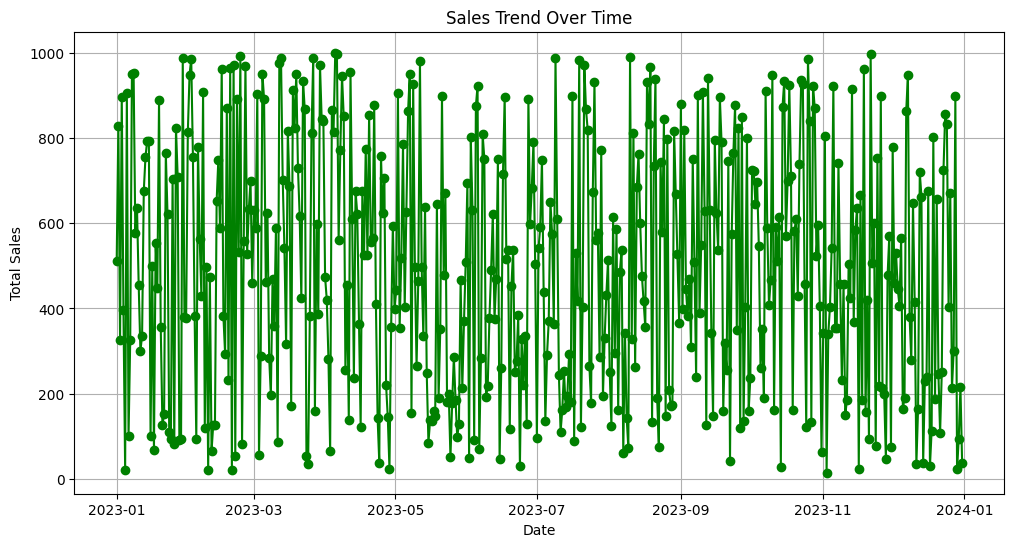

In [31]:
# Sales trend over time
sales_by_date = data.groupby('Date')['Sales Amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date, marker='o', color='green')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

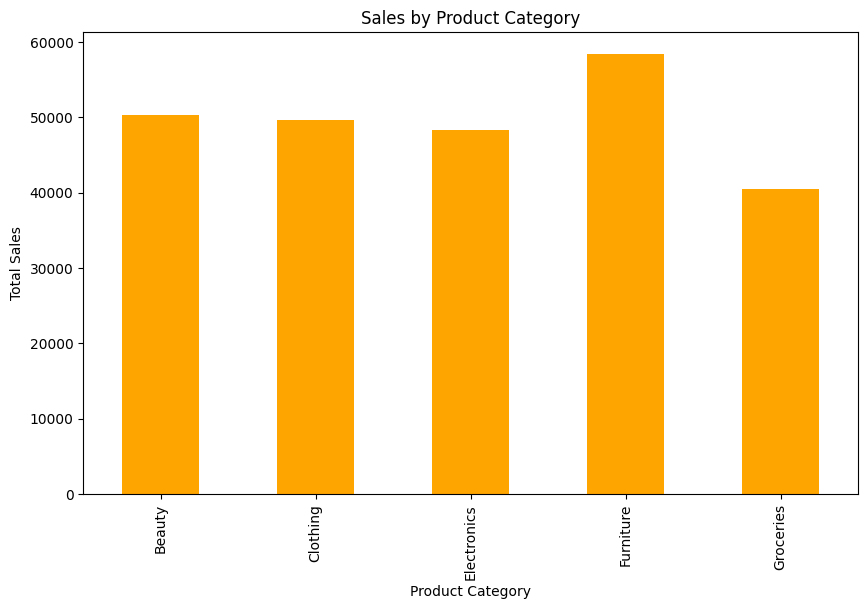

In [36]:
# Sales by Product Category
sales_by_category = data.groupby('Product Category')['Sales Amount'].sum()

plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='orange')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

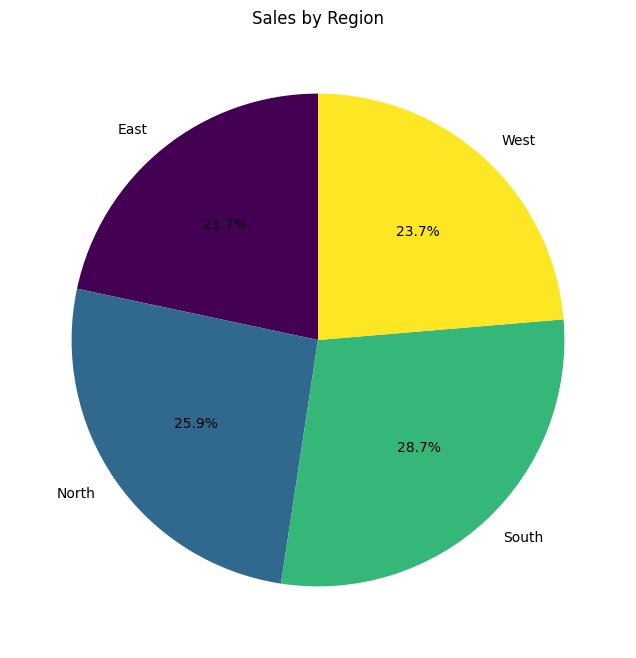

In [39]:
# 3. Sales by Region
sales_by_region = data.groupby('Region')['Sales Amount'].sum()

plt.figure(figsize=(8, 8))
sales_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
plt.title('Sales by Region')
plt.ylabel('')
plt.show()

<ipython-input-41-38239335cd7b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values, palette='coolwarm')


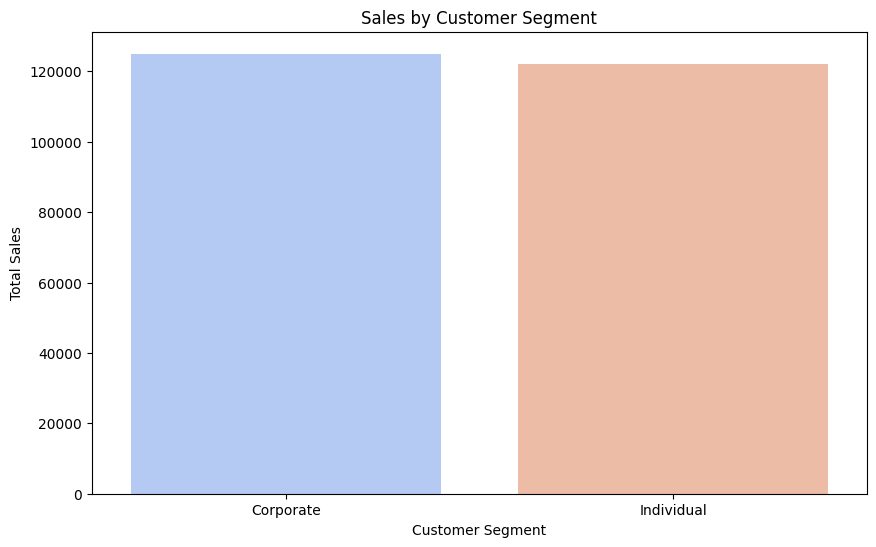

In [41]:
# 4. Customer Segment Analysis
sales_by_segment = data.groupby('Customer Segment')['Sales Amount'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values, palette='coolwarm')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

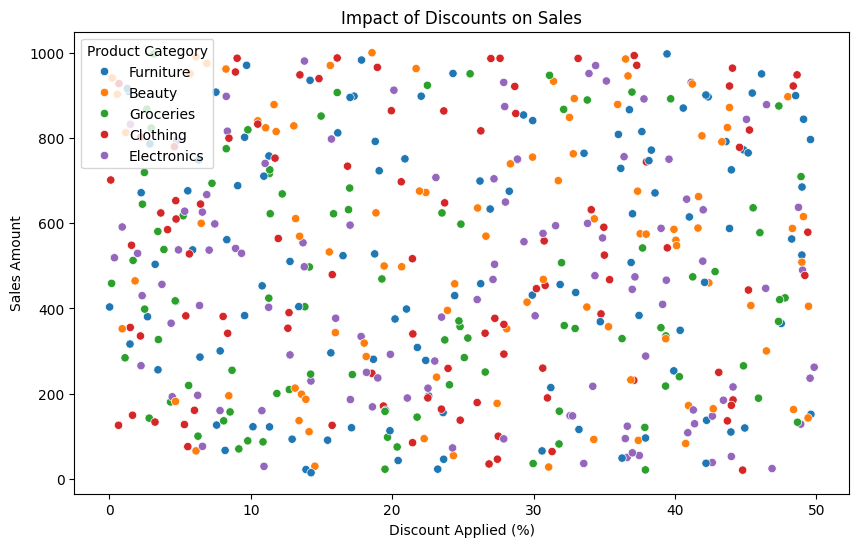

In [43]:
# 5. Impact of Discounts on Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount Applied', y='Sales Amount', hue='Product Category', data=data)
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Sales Amount')
plt.show()

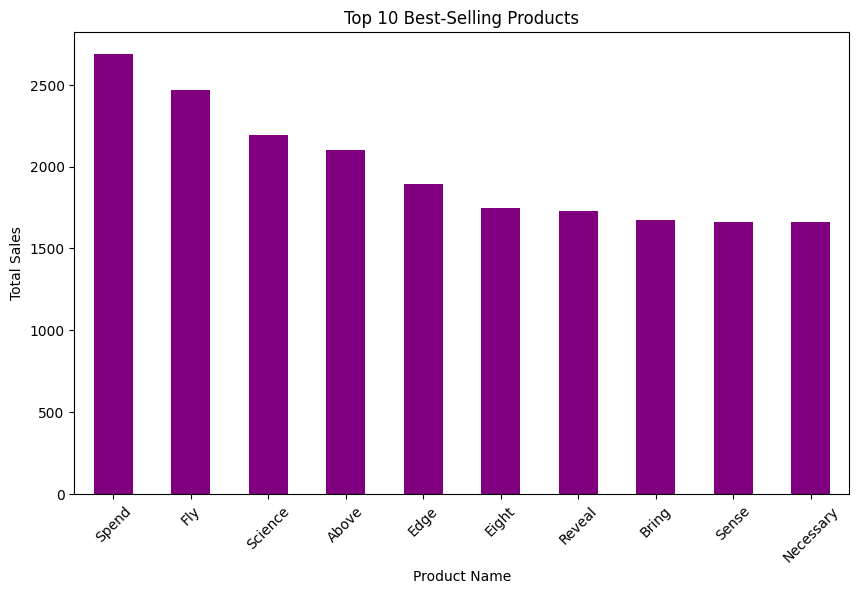

In [44]:
# 6. Top 10 Best-Selling Products
top_products = data.groupby('Product Name')['Sales Amount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='purple')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()